## Forecasting TSI with RNN

This is a notebook created to train the LSTM to forecast TSI, and to make tests with different settings looking for the best one. It is being costumized with the purpose to generate results to the work will be submitted to ICCSA2020.

In [35]:
from library import *

In [36]:
np.random.seed(7)

Loading the net input and the output data. 

The input data initially is a bi-dimensional matrix shaped with a number of samples n and 40 parameters of area, or: 
    
    P.shape = (n,40). 

And the output will have only a single vector of values, or 
    
    T.shape = (n,1)

In [126]:
#x, y = preparingData()
P = np.asarray(np.loadtxt('./partial_output_files/P_PY.csv'))
T = np.asarray(np.loadtxt('./partial_output_files/T_PY.csv'))
P = np.transpose(P)
T = T.reshape(-1,1)

Standarizing the data:

In [127]:
scaler = StandardScaler()

x = scaler.fit_transform(P)
y = scaler.fit_transform(T)

seriesSize = len(y)

Saving the standarized data:

In [128]:
#print('\nArquivos salvos em '+path+' :\n')
np.savetxt('./partial_output_files/pn_PY.csv', x)
#print('pn_PY.csv\n')

np.savetxt('./partial_output_files/tn_PY.csv', y)
#print('tn_PY.csv\n')

Defining a mask value (an outlier value) to replace the nan values of the output vector. (The nets can't deal with nan values)

In [129]:
#m = np.nanmax(y)
#mask_value = int(m+5)
mask_value = 2

Replacing y nan values:

In [130]:
y[np.where(np.isnan(y))] = mask_value

Look_back is the number of time steps used for prepare the input data ***x*** and the corresponding output ***y*** before it is presented to the net. Let's take a simpler example:

   * Considering:
   
                x = [10           and         y = [100
                     20                            200
                     30                            300
                     40]                           400],
            
   * if we choose lookback = 2, we'll have:

            new_x = [[10, 20]     and     new_y = [200
                     [20, 30]                      300
                     [30, 40]]                     400]
                                                

1. Then, if the lookback = 1, we'll have as the updated input ***p*** e and the updated output ***t*** shapes:

        p.shape = (x.shape[0], 1, 40)
        t.shape = (y.shape[0], 1)

2. If the lookback = 2, we'll have as ***p*** and ***t*** shapes:

        p.shape = (x.shape[0] - 1, 2, 40)
        t.shape = (y.shape[0] - 1, 1)

3. So, if the lookback = n, we'll have:

        p.shape = (x.shape[0] - (n-1), n, 40)
        t.shape = (y.shape[0] - (n-1), 1)


In [131]:
lookback = 1

In [132]:
p, t = lookBack(x, y, lookback)
p = np.asarray(p)
t = np.asarray(t)

The Keras RNNs expect a 3D shaped input data: (samples, timesteps, features)!!

Some of net settings:

In [133]:
units = 1
epochs = 150
batch_size=5
mask_value = 2
shuffle = True
test_size = 0.2
loss = 'mean_squared_error'
optimizer = 'adam'
#dropout=0.1

Now, the input and output will be splited up in Train and Test sets:

In [134]:
xTrain, xTest, yTrain, yTest= train_test_split(p, t, test_size=test_size, shuffle=shuffle)

Below there is net configured with a fixed setting and a LSTM hidden layer and a linear output layer

In [135]:
model = Sequential()
model.add(Masking(mask_value=mask_value, input_shape=(xTrain.shape[1],xTrain.shape[2])))
model.add(LSTM(units=units, input_shape=(xTrain.shape[1],xTrain.shape[2])))
#model.add(Dropout(dropout))
model.add(Dense(1))
model.compile(loss=loss, optimizer=optimizer)

f = model.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_data=(xTest,yTest))

Train on 469 samples, validate on 118 samples
Epoch 1/150
469/469 [==============================] - 6s 13ms/step - loss: 1.0529 - val_loss: 0.9464
Epoch 2/150
469/469 [==============================] - 1s 1ms/step - loss: 1.0434 - val_loss: 0.9418
Epoch 3/150
469/469 [==============================] - 1s 1ms/step - loss: 1.0364 - val_loss: 0.9381
Epoch 4/150
469/469 [==============================] - 1s 1ms/step - loss: 1.0280 - val_loss: 0.9323
Epoch 5/150
469/469 [==============================] - 1s 3ms/step - loss: 1.0165 - val_loss: 0.9218
Epoch 6/150
469/469 [==============================] - 3s 7ms/step - loss: 0.9994 - val_loss: 0.9062
Epoch 7/150
469/469 [==============================] - 3s 7ms/step - loss: 0.9708 - val_loss: 0.8820
Epoch 8/150
469/469 [==============================] - 3s 6ms/step - loss: 0.9207 - val_loss: 0.8399
Epoch 9/150
469/469 [==============================] - 4s 8ms/step - loss: 0.8541 - val_loss: 0.7899
Epoch 10/150
469/469 [======================

Epoch 81/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0909 - val_loss: 0.1989
Epoch 82/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0893 - val_loss: 0.1942
Epoch 83/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0882 - val_loss: 0.1960
Epoch 84/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0873 - val_loss: 0.1994
Epoch 85/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0866 - val_loss: 0.1996
Epoch 86/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0857 - val_loss: 0.1932
Epoch 87/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0849 - val_loss: 0.1886
Epoch 88/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0846 - val_loss: 0.1947
Epoch 89/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0840 - val_loss: 0.1896
Epoch 90/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0833

Below a code written to make batch tests, varying net parameters as data batch size hidden unit, epochs, etc.. For each different set of net parameters, 5 trainings will be executed and recorded.

**mse** will keep the training number (1 to 5), the parameter being changed value and the validation error for that train.

In [ ]:
mse = []

#for i in range(5,51,5): # used for testing different values for bacth_size
for i in range(1,11): # used for testing different values for units
    for j in range(5):
        #batch_size = int(trainSize*i/100)
        units = i
        model = Sequential()
        model.add(Masking(mask_value=mask_value, input_shape=(xTrain.shape[1],xTrain.shape[2])))
        model.add(LSTM(units=units, input_dim=xTrain.shape[2]))
        #model.add(Dropout(dropout))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')

        f = model.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_data=(xTest,yTest))
        
        #mse.append([j, batch_size, np.min(f.history['val_loss'])]) # used for testing different values for batch_size
        mse.append([j, units, np.min(f.history['val_loss'])]) # used for testing different values of units
    
np.savetxt('LSTMTests\\HiddenUnitsTest_batch_size'+str(batch_size)+'_'+str(epochs)+'epochs.csv',mse)
#np.savetxt('LSTMTests\\BatchSizeTest_units'+str(units)+'_'+str(epochs)+'epochs.csv',mse)

C:\Users\Ami\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Ami\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=1, input_shape=(None, 40))`
  # This is added back by InteractiveShellApp.init_path()


Train on 469 samples, validate on 118 samples
Epoch 1/300
469/469 [==============================] - 4s 9ms/step - loss: 1.1276 - val_loss: 0.9691
Epoch 2/300
469/469 [==============================] - 0s 920us/step - loss: 1.0808 - val_loss: 0.9373
Epoch 3/300
469/469 [==============================] - 0s 1ms/step - loss: 1.0428 - val_loss: 0.9097
Epoch 4/300
469/469 [==============================] - 0s 991us/step - loss: 1.0088 - val_loss: 0.8833
Epoch 5/300
469/469 [==============================] - 0s 1ms/step - loss: 0.9731 - val_loss: 0.8514
Epoch 6/300
469/469 [==============================] - 0s 938us/step - loss: 0.9349 - val_loss: 0.8135
Epoch 7/300
469/469 [==============================] - 0s 944us/step - loss: 0.8949 - val_loss: 0.7777
Epoch 8/300
469/469 [==============================] - 0s 1ms/step - loss: 0.8568 - val_loss: 0.7438
Epoch 9/300
469/469 [==============================] - 0s 1ms/step - loss: 0.8213 - val_loss: 0.7148
Epoch 10/300
469/469 [===============

469/469 [==============================] - 0s 872us/step - loss: 0.0659 - val_loss: 0.0688
Epoch 159/300
469/469 [==============================] - 0s 781us/step - loss: 0.0647 - val_loss: 0.0719
Epoch 160/300
469/469 [==============================] - 0s 852us/step - loss: 0.0658 - val_loss: 0.0691
Epoch 161/300
469/469 [==============================] - 0s 906us/step - loss: 0.0651 - val_loss: 0.0695
Epoch 162/300
469/469 [==============================] - 0s 793us/step - loss: 0.0644 - val_loss: 0.0720
Epoch 163/300
469/469 [==============================] - 0s 890us/step - loss: 0.0633 - val_loss: 0.0712
Epoch 164/300
469/469 [==============================] - 0s 811us/step - loss: 0.0631 - val_loss: 0.0779
Epoch 165/300
469/469 [==============================] - 0s 796us/step - loss: 0.0641 - val_loss: 0.0730
Epoch 166/300
469/469 [==============================] - 0s 776us/step - loss: 0.0629 - val_loss: 0.0724
Epoch 167/300
469/469 [==============================] - 0s 817us/ste

469/469 [==============================] - 1s 2ms/step - loss: 0.0453 - val_loss: 0.0724
Epoch 238/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0464 - val_loss: 0.0683
Epoch 239/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0462 - val_loss: 0.0669
Epoch 240/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0462 - val_loss: 0.0689
Epoch 241/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0462 - val_loss: 0.0678
Epoch 242/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0463 - val_loss: 0.0714
Epoch 243/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0459 - val_loss: 0.0680
Epoch 244/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0454 - val_loss: 0.0700
Epoch 245/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0454 - val_loss: 0.0678
Epoch 246/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0448 - v

469/469 [==============================] - 2s 4ms/step - loss: 0.0881 - val_loss: 0.0698
Epoch 96/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0877 - val_loss: 0.0719
Epoch 97/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0872 - val_loss: 0.0735
Epoch 98/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0867 - val_loss: 0.0701
Epoch 99/300
469/469 [==============================] - 2s 3ms/step - loss: 0.0868 - val_loss: 0.0704
Epoch 100/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0862 - val_loss: 0.0689
Epoch 101/300
469/469 [==============================] - 2s 3ms/step - loss: 0.0854 - val_loss: 0.0754
Epoch 102/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0856 - val_loss: 0.0650
Epoch 103/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0846 - val_loss: 0.0678
Epoch 104/300
469/469 [==============================] - 2s 3ms/step - loss: 0.0834 - val_l

469/469 [==============================] - 1s 2ms/step - loss: 0.0485 - val_loss: 0.0838
Epoch 254/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0485 - val_loss: 0.0756
Epoch 255/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0482 - val_loss: 0.0836
Epoch 256/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0481 - val_loss: 0.0857
Epoch 257/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0476 - val_loss: 0.0781
Epoch 258/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0481 - val_loss: 0.0794
Epoch 259/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0478 - val_loss: 0.0765
Epoch 260/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0484 - val_loss: 0.0739
Epoch 261/300
469/469 [==============================] - 3s 6ms/step - loss: 0.0472 - val_loss: 0.0776
Epoch 262/300
469/469 [==============================] - 3s 7ms/step - loss: 0.0471 - v

469/469 [==============================] - 0s 841us/step - loss: 0.2542 - val_loss: 0.1957
Epoch 33/300
469/469 [==============================] - 0s 763us/step - loss: 0.2455 - val_loss: 0.1885
Epoch 34/300
469/469 [==============================] - 0s 781us/step - loss: 0.2367 - val_loss: 0.1796
Epoch 35/300
469/469 [==============================] - 0s 784us/step - loss: 0.2284 - val_loss: 0.1745
Epoch 36/300
469/469 [==============================] - 0s 865us/step - loss: 0.2211 - val_loss: 0.1700
Epoch 37/300
469/469 [==============================] - 0s 767us/step - loss: 0.2149 - val_loss: 0.1631
Epoch 38/300
469/469 [==============================] - 0s 743us/step - loss: 0.2087 - val_loss: 0.1595
Epoch 39/300
469/469 [==============================] - 0s 761us/step - loss: 0.2032 - val_loss: 0.1591
Epoch 40/300
469/469 [==============================] - 0s 776us/step - loss: 0.1971 - val_loss: 0.1515
Epoch 41/300
469/469 [==============================] - 0s 895us/step - loss:

Epoch 111/300
469/469 [==============================] - 0s 636us/step - loss: 0.0956 - val_loss: 0.1029
Epoch 112/300
469/469 [==============================] - 0s 656us/step - loss: 0.0950 - val_loss: 0.1010
Epoch 113/300
469/469 [==============================] - 0s 980us/step - loss: 0.0952 - val_loss: 0.1055
Epoch 114/300
469/469 [==============================] - 0s 741us/step - loss: 0.0937 - val_loss: 0.1018
Epoch 115/300
469/469 [==============================] - 0s 665us/step - loss: 0.0942 - val_loss: 0.1040
Epoch 116/300
469/469 [==============================] - 0s 861us/step - loss: 0.0931 - val_loss: 0.1034
Epoch 117/300
469/469 [==============================] - 0s 762us/step - loss: 0.0938 - val_loss: 0.1026
Epoch 118/300
469/469 [==============================] - 0s 867us/step - loss: 0.0934 - val_loss: 0.1026
Epoch 119/300
469/469 [==============================] - 0s 713us/step - loss: 0.0936 - val_loss: 0.1067
Epoch 120/300
469/469 [==============================] 

469/469 [==============================] - 1s 2ms/step - loss: 0.0529 - val_loss: 0.0748
Epoch 269/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0535 - val_loss: 0.0749
Epoch 270/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0537 - val_loss: 0.0740
Epoch 271/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0526 - val_loss: 0.0710
Epoch 272/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0529 - val_loss: 0.0700
Epoch 273/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0536 - val_loss: 0.0735
Epoch 274/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0523 - val_loss: 0.0745
Epoch 275/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0524 - val_loss: 0.0734
Epoch 276/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0523 - val_loss: 0.0753
Epoch 277/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0520 - v

Epoch 47/300
469/469 [==============================] - 0s 846us/step - loss: 0.1754 - val_loss: 0.1264
Epoch 48/300
469/469 [==============================] - 0s 829us/step - loss: 0.1723 - val_loss: 0.1282
Epoch 49/300
469/469 [==============================] - 0s 871us/step - loss: 0.1698 - val_loss: 0.1216
Epoch 50/300
469/469 [==============================] - 0s 759us/step - loss: 0.1670 - val_loss: 0.1212
Epoch 51/300
469/469 [==============================] - 0s 739us/step - loss: 0.1645 - val_loss: 0.1188
Epoch 52/300
469/469 [==============================] - 1s 1ms/step - loss: 0.1615 - val_loss: 0.1151
Epoch 53/300
469/469 [==============================] - 1s 3ms/step - loss: 0.1592 - val_loss: 0.1157
Epoch 54/300
469/469 [==============================] - 2s 4ms/step - loss: 0.1561 - val_loss: 0.1143
Epoch 55/300
469/469 [==============================] - 1s 3ms/step - loss: 0.1534 - val_loss: 0.1053
Epoch 56/300
469/469 [==============================] - 1s 3ms/step - lo

469/469 [==============================] - 0s 1ms/step - loss: 0.0800 - val_loss: 0.0832
Epoch 206/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0803 - val_loss: 0.0799
Epoch 207/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0800 - val_loss: 0.0825
Epoch 208/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0791 - val_loss: 0.0788
Epoch 209/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0799 - val_loss: 0.0849
Epoch 210/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0809 - val_loss: 0.0813
Epoch 211/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0790 - val_loss: 0.0862
Epoch 212/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0784 - val_loss: 0.0844
Epoch 213/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0794 - val_loss: 0.0842
Epoch 214/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0788 - v

Epoch 64/300
469/469 [==============================] - 2s 3ms/step - loss: 0.1140 - val_loss: 0.0972
Epoch 65/300
469/469 [==============================] - 2s 4ms/step - loss: 0.1139 - val_loss: 0.0915
Epoch 66/300
469/469 [==============================] - 2s 3ms/step - loss: 0.1149 - val_loss: 0.0932
Epoch 67/300
469/469 [==============================] - 1s 3ms/step - loss: 0.1114 - val_loss: 0.0924
Epoch 68/300
469/469 [==============================] - 1s 3ms/step - loss: 0.1103 - val_loss: 0.0926
Epoch 69/300
469/469 [==============================] - 1s 3ms/step - loss: 0.1105 - val_loss: 0.0908
Epoch 70/300
469/469 [==============================] - 2s 3ms/step - loss: 0.1083 - val_loss: 0.0889
Epoch 71/300
469/469 [==============================] - 1s 3ms/step - loss: 0.1079 - val_loss: 0.0918
Epoch 72/300
469/469 [==============================] - 1s 3ms/step - loss: 0.1060 - val_loss: 0.0901
Epoch 73/300
469/469 [==============================] - 2s 4ms/step - loss: 0.1058

Epoch 144/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0647 - val_loss: 0.0777
Epoch 145/300
469/469 [==============================] - 2s 3ms/step - loss: 0.0643 - val_loss: 0.0797
Epoch 146/300
469/469 [==============================] - 3s 7ms/step - loss: 0.0652 - val_loss: 0.0792
Epoch 147/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0647 - val_loss: 0.0821
Epoch 148/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0647 - val_loss: 0.0833
Epoch 149/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0637 - val_loss: 0.0804
Epoch 150/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0636 - val_loss: 0.0764
Epoch 151/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0630 - val_loss: 0.0799
Epoch 152/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0631 - val_loss: 0.0824
Epoch 153/300
469/469 [==============================] - 1s 1ms/step - lo

C:\Users\Ami\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=2, input_shape=(None, 40))`
  # This is added back by InteractiveShellApp.init_path()


Train on 469 samples, validate on 118 samples
Epoch 1/300
469/469 [==============================] - 5s 12ms/step - loss: 1.0137 - val_loss: 0.8652
Epoch 2/300
469/469 [==============================] - 0s 726us/step - loss: 0.9731 - val_loss: 0.8108
Epoch 3/300
469/469 [==============================] - 0s 751us/step - loss: 0.9168 - val_loss: 0.7513
Epoch 4/300
469/469 [==============================] - 0s 705us/step - loss: 0.8427 - val_loss: 0.6784
Epoch 5/300
469/469 [==============================] - 0s 666us/step - loss: 0.7548 - val_loss: 0.6096
Epoch 6/300
469/469 [==============================] - 0s 796us/step - loss: 0.6672 - val_loss: 0.5392
Epoch 7/300
469/469 [==============================] - 0s 731us/step - loss: 0.5837 - val_loss: 0.4803
Epoch 8/300
469/469 [==============================] - 0s 761us/step - loss: 0.5095 - val_loss: 0.4285
Epoch 9/300
469/469 [==============================] - 0s 737us/step - loss: 0.4464 - val_loss: 0.3804
Epoch 10/300
469/469 [======

Epoch 160/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0233 - val_loss: 0.1641
Epoch 161/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0250 - val_loss: 0.1659
Epoch 162/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0236 - val_loss: 0.1703
Epoch 163/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0243 - val_loss: 0.1762
Epoch 164/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0238 - val_loss: 0.1755
Epoch 165/300
469/469 [==============================] - 0s 971us/step - loss: 0.0230 - val_loss: 0.1714
Epoch 166/300
469/469 [==============================] - 0s 971us/step - loss: 0.0226 - val_loss: 0.1699
Epoch 167/300
469/469 [==============================] - 0s 949us/step - loss: 0.0243 - val_loss: 0.1701
Epoch 168/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0231 - val_loss: 0.1690
Epoch 169/300
469/469 [==============================] - 1s 1ms/ste

469/469 [==============================] - 1s 3ms/step - loss: 0.3471 - val_loss: 0.2596
Epoch 17/300
469/469 [==============================] - 2s 4ms/step - loss: 0.3235 - val_loss: 0.2464
Epoch 18/300
469/469 [==============================] - 1s 3ms/step - loss: 0.3027 - val_loss: 0.2373
Epoch 19/300
469/469 [==============================] - 1s 2ms/step - loss: 0.2823 - val_loss: 0.2257
Epoch 20/300
469/469 [==============================] - 1s 2ms/step - loss: 0.2641 - val_loss: 0.2161
Epoch 21/300
469/469 [==============================] - 1s 2ms/step - loss: 0.2472 - val_loss: 0.2104
Epoch 22/300
469/469 [==============================] - 1s 3ms/step - loss: 0.2329 - val_loss: 0.2058
Epoch 23/300
469/469 [==============================] - 1s 2ms/step - loss: 0.2178 - val_loss: 0.1997
Epoch 24/300
469/469 [==============================] - 1s 2ms/step - loss: 0.2062 - val_loss: 0.1923
Epoch 25/300
469/469 [==============================] - 1s 2ms/step - loss: 0.1941 - val_loss: 

469/469 [==============================] - 0s 576us/step - loss: 0.0209 - val_loss: 0.1209
Epoch 175/300
469/469 [==============================] - 0s 629us/step - loss: 0.0209 - val_loss: 0.1233
Epoch 176/300
469/469 [==============================] - 0s 600us/step - loss: 0.0206 - val_loss: 0.1237
Epoch 177/300
469/469 [==============================] - 0s 672us/step - loss: 0.0204 - val_loss: 0.1205
Epoch 178/300
469/469 [==============================] - 0s 624us/step - loss: 0.0208 - val_loss: 0.1278
Epoch 179/300
469/469 [==============================] - 0s 602us/step - loss: 0.0204 - val_loss: 0.1255
Epoch 180/300
469/469 [==============================] - 0s 655us/step - loss: 0.0202 - val_loss: 0.1250
Epoch 181/300
469/469 [==============================] - 0s 588us/step - loss: 0.0198 - val_loss: 0.1221
Epoch 182/300
469/469 [==============================] - 0s 622us/step - loss: 0.0202 - val_loss: 0.1161
Epoch 183/300
469/469 [==============================] - 0s 600us/ste

469/469 [==============================] - 1s 3ms/step - loss: 0.1408 - val_loss: 0.1437
Epoch 31/300
469/469 [==============================] - 1s 2ms/step - loss: 0.1344 - val_loss: 0.1364
Epoch 32/300
469/469 [==============================] - 1s 2ms/step - loss: 0.1300 - val_loss: 0.1388
Epoch 33/300
469/469 [==============================] - 1s 2ms/step - loss: 0.1245 - val_loss: 0.1357
Epoch 34/300
469/469 [==============================] - 1s 2ms/step - loss: 0.1188 - val_loss: 0.1278
Epoch 35/300
469/469 [==============================] - 1s 2ms/step - loss: 0.1134 - val_loss: 0.1295
Epoch 36/300
469/469 [==============================] - 1s 2ms/step - loss: 0.1103 - val_loss: 0.1254
Epoch 37/300
469/469 [==============================] - 2s 4ms/step - loss: 0.1051 - val_loss: 0.1243
Epoch 38/300
469/469 [==============================] - 2s 4ms/step - loss: 0.1015 - val_loss: 0.1195
Epoch 39/300
469/469 [==============================] - 2s 4ms/step - loss: 0.0976 - val_loss: 

469/469 [==============================] - 1s 2ms/step - loss: 0.0245 - val_loss: 0.1146
Epoch 190/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0241 - val_loss: 0.1108
Epoch 191/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0251 - val_loss: 0.1178
Epoch 192/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0245 - val_loss: 0.1119
Epoch 193/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0252 - val_loss: 0.1111
Epoch 194/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0243 - val_loss: 0.1160
Epoch 195/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0247 - val_loss: 0.1160
Epoch 196/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0246 - val_loss: 0.1148
Epoch 197/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0240 - val_loss: 0.1182
Epoch 198/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0249 - v

469/469 [==============================] - 1s 1ms/step - loss: 0.0795 - val_loss: 0.1496
Epoch 47/300
469/469 [==============================] - 0s 808us/step - loss: 0.0779 - val_loss: 0.1480
Epoch 48/300
469/469 [==============================] - 0s 872us/step - loss: 0.0760 - val_loss: 0.1523
Epoch 49/300
469/469 [==============================] - 0s 802us/step - loss: 0.0732 - val_loss: 0.1458
Epoch 50/300
469/469 [==============================] - 0s 890us/step - loss: 0.0716 - val_loss: 0.1516
Epoch 51/300
469/469 [==============================] - 0s 867us/step - loss: 0.0691 - val_loss: 0.1492
Epoch 52/300
469/469 [==============================] - 0s 891us/step - loss: 0.0676 - val_loss: 0.1519
Epoch 53/300
469/469 [==============================] - 0s 984us/step - loss: 0.0663 - val_loss: 0.1486
Epoch 54/300
469/469 [==============================] - 0s 904us/step - loss: 0.0643 - val_loss: 0.1495
Epoch 55/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0

Epoch 125/300
469/469 [==============================] - 0s 900us/step - loss: 0.0234 - val_loss: 0.1759
Epoch 126/300
469/469 [==============================] - 0s 887us/step - loss: 0.0238 - val_loss: 0.1710
Epoch 127/300
469/469 [==============================] - 0s 917us/step - loss: 0.0229 - val_loss: 0.1854
Epoch 128/300
469/469 [==============================] - 0s 888us/step - loss: 0.0229 - val_loss: 0.1716
Epoch 129/300
469/469 [==============================] - 0s 921us/step - loss: 0.0231 - val_loss: 0.1762
Epoch 130/300
469/469 [==============================] - 0s 856us/step - loss: 0.0226 - val_loss: 0.1849
Epoch 131/300
469/469 [==============================] - 0s 906us/step - loss: 0.0223 - val_loss: 0.1743
Epoch 132/300
469/469 [==============================] - 0s 902us/step - loss: 0.0226 - val_loss: 0.1857
Epoch 133/300
469/469 [==============================] - 0s 864us/step - loss: 0.0222 - val_loss: 0.1866
Epoch 134/300
469/469 [==============================] 

469/469 [==============================] - 0s 937us/step - loss: 0.0107 - val_loss: 0.2526
Epoch 282/300
469/469 [==============================] - 0s 974us/step - loss: 0.0101 - val_loss: 0.2515
Epoch 283/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0105 - val_loss: 0.2498
Epoch 284/300
469/469 [==============================] - 0s 833us/step - loss: 0.0106 - val_loss: 0.2518
Epoch 285/300
469/469 [==============================] - 0s 850us/step - loss: 0.0104 - val_loss: 0.2481
Epoch 286/300
469/469 [==============================] - 0s 904us/step - loss: 0.0105 - val_loss: 0.2573
Epoch 287/300
469/469 [==============================] - 0s 876us/step - loss: 0.0109 - val_loss: 0.2415
Epoch 288/300
469/469 [==============================] - 0s 920us/step - loss: 0.0103 - val_loss: 0.2530
Epoch 289/300
469/469 [==============================] - 0s 861us/step - loss: 0.0105 - val_loss: 0.2527
Epoch 290/300
469/469 [==============================] - 1s 1ms/step - 

Epoch 60/300
469/469 [==============================] - 0s 883us/step - loss: 0.0610 - val_loss: 0.0953
Epoch 61/300
469/469 [==============================] - 0s 913us/step - loss: 0.0600 - val_loss: 0.1013
Epoch 62/300
469/469 [==============================] - 0s 875us/step - loss: 0.0581 - val_loss: 0.0991
Epoch 63/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0577 - val_loss: 0.1003
Epoch 64/300
469/469 [==============================] - 0s 923us/step - loss: 0.0565 - val_loss: 0.1024
Epoch 65/300
469/469 [==============================] - 0s 975us/step - loss: 0.0569 - val_loss: 0.0997
Epoch 66/300
469/469 [==============================] - 0s 807us/step - loss: 0.0552 - val_loss: 0.1028
Epoch 67/300
469/469 [==============================] - 0s 791us/step - loss: 0.0538 - val_loss: 0.1060
Epoch 68/300
469/469 [==============================] - 0s 769us/step - loss: 0.0534 - val_loss: 0.1005
Epoch 69/300
469/469 [==============================] - 0s 794us/s

469/469 [==============================] - 0s 866us/step - loss: 0.0189 - val_loss: 0.1478
Epoch 217/300
469/469 [==============================] - 0s 898us/step - loss: 0.0190 - val_loss: 0.1459
Epoch 218/300
469/469 [==============================] - 0s 869us/step - loss: 0.0190 - val_loss: 0.1471
Epoch 219/300
469/469 [==============================] - 0s 800us/step - loss: 0.0185 - val_loss: 0.1540
Epoch 220/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0194 - val_loss: 0.1500
Epoch 221/300
469/469 [==============================] - 0s 924us/step - loss: 0.0187 - val_loss: 0.1473
Epoch 222/300
469/469 [==============================] - 0s 924us/step - loss: 0.0187 - val_loss: 0.1487
Epoch 223/300
469/469 [==============================] - 0s 858us/step - loss: 0.0195 - val_loss: 0.1447
Epoch 224/300
469/469 [==============================] - 0s 913us/step - loss: 0.0187 - val_loss: 0.1474
Epoch 225/300
469/469 [==============================] - 1s 1ms/step - 

Epoch 295/300
469/469 [==============================] - 0s 977us/step - loss: 0.0158 - val_loss: 0.1423
Epoch 296/300
469/469 [==============================] - 0s 852us/step - loss: 0.0156 - val_loss: 0.1420
Epoch 297/300
469/469 [==============================] - 0s 812us/step - loss: 0.0157 - val_loss: 0.1470
Epoch 298/300
469/469 [==============================] - 0s 935us/step - loss: 0.0152 - val_loss: 0.1367
Epoch 299/300
469/469 [==============================] - 0s 837us/step - loss: 0.0154 - val_loss: 0.1396
Epoch 300/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0158 - val_loss: 0.1390


C:\Users\Ami\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=3, input_shape=(None, 40))`
  # This is added back by InteractiveShellApp.init_path()


Train on 469 samples, validate on 118 samples
Epoch 1/300
469/469 [==============================] - 11s 24ms/step - loss: 1.0823 - val_loss: 0.8933
Epoch 2/300
469/469 [==============================] - 0s 935us/step - loss: 0.9769 - val_loss: 0.8074
Epoch 3/300
469/469 [==============================] - 1s 1ms/step - loss: 0.8983 - val_loss: 0.7276
Epoch 4/300
469/469 [==============================] - 1s 1ms/step - loss: 0.8214 - val_loss: 0.6615
Epoch 5/300
469/469 [==============================] - 0s 1ms/step - loss: 0.7342 - val_loss: 0.5902
Epoch 6/300
469/469 [==============================] - 1s 1ms/step - loss: 0.6428 - val_loss: 0.5252
Epoch 7/300
469/469 [==============================] - 0s 1ms/step - loss: 0.5534 - val_loss: 0.4603
Epoch 8/300
469/469 [==============================] - 1s 1ms/step - loss: 0.4720 - val_loss: 0.4096
Epoch 9/300
469/469 [==============================] - 1s 1ms/step - loss: 0.4026 - val_loss: 0.3612
Epoch 10/300
469/469 [===================

469/469 [==============================] - 0s 885us/step - loss: 0.0126 - val_loss: 0.1264
Epoch 160/300
469/469 [==============================] - 0s 978us/step - loss: 0.0124 - val_loss: 0.1228
Epoch 161/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0121 - val_loss: 0.1270
Epoch 162/300
469/469 [==============================] - 0s 897us/step - loss: 0.0121 - val_loss: 0.1218
Epoch 163/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0127 - val_loss: 0.1282
Epoch 164/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0120 - val_loss: 0.1283
Epoch 165/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0120 - val_loss: 0.1288
Epoch 166/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0116 - val_loss: 0.1223
Epoch 167/300
469/469 [==============================] - 0s 1000us/step - loss: 0.0113 - val_loss: 0.1228
Epoch 168/300
469/469 [==============================] - 1s 1ms/step - loss: 0

Epoch 238/300
469/469 [==============================] - 0s 903us/step - loss: 0.0076 - val_loss: 0.1193
Epoch 239/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.1219
Epoch 240/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0076 - val_loss: 0.1170
Epoch 241/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0072 - val_loss: 0.1204
Epoch 242/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 0.1241
Epoch 243/300
469/469 [==============================] - 0s 996us/step - loss: 0.0075 - val_loss: 0.1222
Epoch 244/300
469/469 [==============================] - 0s 898us/step - loss: 0.0075 - val_loss: 0.1207
Epoch 245/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0074 - val_loss: 0.1168
Epoch 246/300
469/469 [==============================] - 0s 975us/step - loss: 0.0079 - val_loss: 0.1224
Epoch 247/300
469/469 [==============================] - 1s 1ms/s

469/469 [==============================] - 0s 1ms/step - loss: 0.0180 - val_loss: 0.1574
Epoch 96/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0179 - val_loss: 0.1550
Epoch 97/300
469/469 [==============================] - 0s 972us/step - loss: 0.0179 - val_loss: 0.1505
Epoch 98/300
469/469 [==============================] - 0s 974us/step - loss: 0.0171 - val_loss: 0.1662
Epoch 99/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0172 - val_loss: 0.1521
Epoch 100/300
469/469 [==============================] - 0s 979us/step - loss: 0.0168 - val_loss: 0.1639
Epoch 101/300
469/469 [==============================] - 0s 938us/step - loss: 0.0165 - val_loss: 0.1516
Epoch 102/300
469/469 [==============================] - 0s 899us/step - loss: 0.0160 - val_loss: 0.1640
Epoch 103/300
469/469 [==============================] - 0s 932us/step - loss: 0.0161 - val_loss: 0.1583
Epoch 104/300
469/469 [==============================] - 0s 1ms/step - loss: 0.

Epoch 252/300
469/469 [==============================] - 0s 934us/step - loss: 0.0061 - val_loss: 0.2037
Epoch 253/300
469/469 [==============================] - 0s 888us/step - loss: 0.0063 - val_loss: 0.2125
Epoch 254/300
469/469 [==============================] - 0s 914us/step - loss: 0.0067 - val_loss: 0.2026
Epoch 255/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0058 - val_loss: 0.2148
Epoch 256/300
469/469 [==============================] - 0s 990us/step - loss: 0.0058 - val_loss: 0.2052
Epoch 257/300
469/469 [==============================] - 0s 890us/step - loss: 0.0060 - val_loss: 0.2080
Epoch 258/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0058 - val_loss: 0.2103
Epoch 259/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0059 - val_loss: 0.2045
Epoch 260/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.2073
Epoch 261/300
469/469 [==============================] - 0s 894

469/469 [==============================] - 1s 2ms/step - loss: 0.0795 - val_loss: 0.1394
Epoch 32/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0761 - val_loss: 0.1378
Epoch 33/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0732 - val_loss: 0.1384
Epoch 34/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0703 - val_loss: 0.1373
Epoch 35/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0672 - val_loss: 0.1356
Epoch 36/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0652 - val_loss: 0.1375
Epoch 37/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0634 - val_loss: 0.1398
Epoch 38/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0615 - val_loss: 0.1408
Epoch 39/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0595 - val_loss: 0.1349
Epoch 40/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0568 - val_loss: 

469/469 [==============================] - 1s 2ms/step - loss: 0.0202 - val_loss: 0.1292
Epoch 112/300
469/469 [==============================] - 1s 2ms/step - loss: 0.0194 - val_loss: 0.1273
Epoch 113/300
469/469 [==============================] - 3s 6ms/step - loss: 0.0190 - val_loss: 0.1309
Epoch 114/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0199 - val_loss: 0.1273
Epoch 115/300
469/469 [==============================] - 1s 3ms/step - loss: 0.0189 - val_loss: 0.1303
Epoch 116/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0191 - val_loss: 0.1315
Epoch 117/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0191 - val_loss: 0.1298
Epoch 118/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0190 - val_loss: 0.1261
Epoch 119/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0190 - val_loss: 0.1297
Epoch 120/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0186 - v

Epoch 269/300
469/469 [==============================] - 0s 915us/step - loss: 0.0090 - val_loss: 0.1423
Epoch 270/300
469/469 [==============================] - 0s 959us/step - loss: 0.0091 - val_loss: 0.1363
Epoch 271/300
469/469 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.1395
Epoch 272/300
469/469 [==============================] - 0s 970us/step - loss: 0.0089 - val_loss: 0.1380
Epoch 273/300
469/469 [==============================] - 0s 995us/step - loss: 0.0085 - val_loss: 0.1379
Epoch 274/300
469/469 [==============================] - 0s 935us/step - loss: 0.0090 - val_loss: 0.1424
Epoch 275/300
469/469 [==============================] - 0s 957us/step - loss: 0.0085 - val_loss: 0.1404
Epoch 276/300
469/469 [==============================] - 0s 943us/step - loss: 0.0088 - val_loss: 0.1388
Epoch 277/300
469/469 [==============================] - 0s 910us/step - loss: 0.0086 - val_loss: 0.1358
Epoch 278/300
469/469 [==============================] - 

469/469 [==============================] - 0s 937us/step - loss: 0.0150 - val_loss: 0.2077
Epoch 127/300
469/469 [==============================] - 1s 1ms/step - loss: 0.0149 - val_loss: 0.2077
Epoch 128/300
469/469 [==============================] - 0s 901us/step - loss: 0.0147 - val_loss: 0.2115
Epoch 129/300
469/469 [==============================] - 0s 966us/step - loss: 0.0141 - val_loss: 0.2026
Epoch 130/300
469/469 [==============================] - 0s 921us/step - loss: 0.0140 - val_loss: 0.2131
Epoch 131/300
469/469 [==============================] - 0s 850us/step - loss: 0.0140 - val_loss: 0.2029
Epoch 132/300
469/469 [==============================] - 0s 857us/step - loss: 0.0144 - val_loss: 0.2058
Epoch 133/300
469/469 [==============================] - 0s 920us/step - loss: 0.0139 - val_loss: 0.2089
Epoch 134/300
469/469 [==============================] - 0s 943us/step - loss: 0.0139 - val_loss: 0.2117
Epoch 135/300
469/469 [==============================] - 0s 906us/step 

Plot comparing the best values 

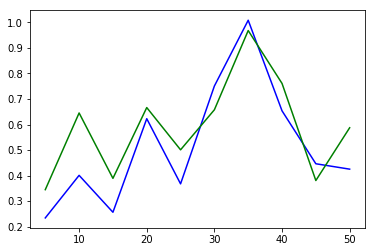

In [210]:
mse = np.asarray(mse)
plt.figure()
plt.plot(mse[:,0],mse[:,1],'b-',mse[:,0],mse[:,2],'g-')

In [84]:
# make predictions
trainPredictedY = model.predict(xTrain)
testPredictedY = model.predict(xTest)    

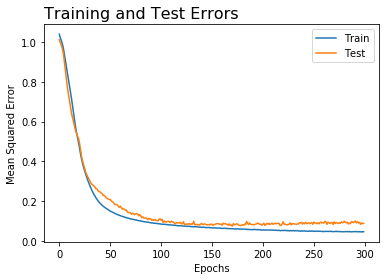

In [86]:
fig = plt.plot(fig_size=(12,6))
plt.plot(f.history['loss'], label='Train')
plt.plot(f.history['val_loss'], label='Test')
plt.title('Training and Test Errors', loc='left', fontsize=16)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

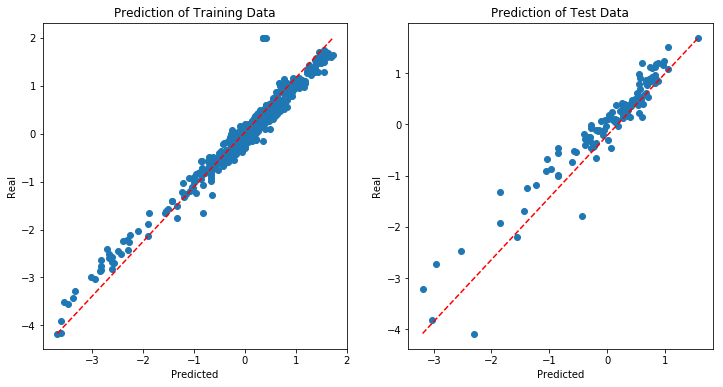

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#scaler = StandardScaler()

#trainPredictedY = scaler.inverse_transform(trainPredictedY)
#yTrain = scaler.inverse_transform(yTrain)
#plt.figure()
ax1.scatter(trainPredictedY,yTrain)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Real')
ax1.set_title('Prediction of Training Data')
#plt.plot([-2,2],[-2,2])
ax1.plot([trainPredictedY.min(), trainPredictedY.max()], [yTrain.min(), yTrain.max()], color='red', 
         linestyle='--', label='optimal')

#testPredictedY = scaler.inverse_transform(testPredictedY)
#yTest = scaler.inverse_transform(yTest)
#plt.figure()
ax2.scatter(testPredictedY,yTest)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Real')
ax2.set_title('Prediction of Test Data')
#plt.plot([-2,2],[-2,2])
ax2.plot([testPredictedY.min(), testPredictedY.max()], [yTest.min(), yTest.max()], color='red', 
         linestyle='--', label='optimal')

(469, 1)

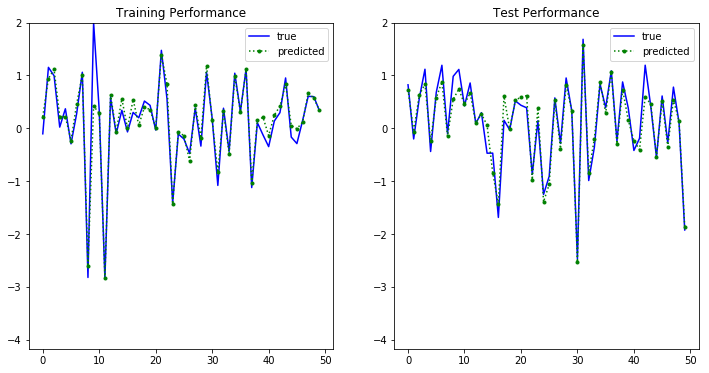

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
#plt.figure()
ax1.plot(yTrain[:50],'b-',label='true')
ax1.plot(trainPredictedY[:50],'g.:',label='predicted')
ax1.set_ylim((yTrain.min(),yTrain.max()))
ax1.set_title('Training Performance')
ax1.legend()

#plt.figure()
ax2.plot(yTest[:50],'b-',label='true')
ax2.plot(testPredictedY[:50],'g.:',label='predicted')
ax2.set_ylim((yTrain.min(),yTrain.max()))
ax2.set_title('Test Performance')
ax2.legend()

In [31]:
np.min(f.history['val_loss'])

0.06949395647714451